In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
import re
def extract_title(name):
    match = re.search(r',\s*([^.]+)\.', name)
    if match:
        title = match.group(1).strip()
        if title in ['Mr']:
            return 'Mr'
        elif title in ['Miss', 'Mlle', 'Ms']:
            return 'Miss'
        elif title in ['Mrs', 'Mme']:
            return 'Mrs'
        elif title == 'Master':
            return 'Master'
        else:
            return 'Other'
    return 'Other'

df['Title'] = df['Name'].apply(extract_title)

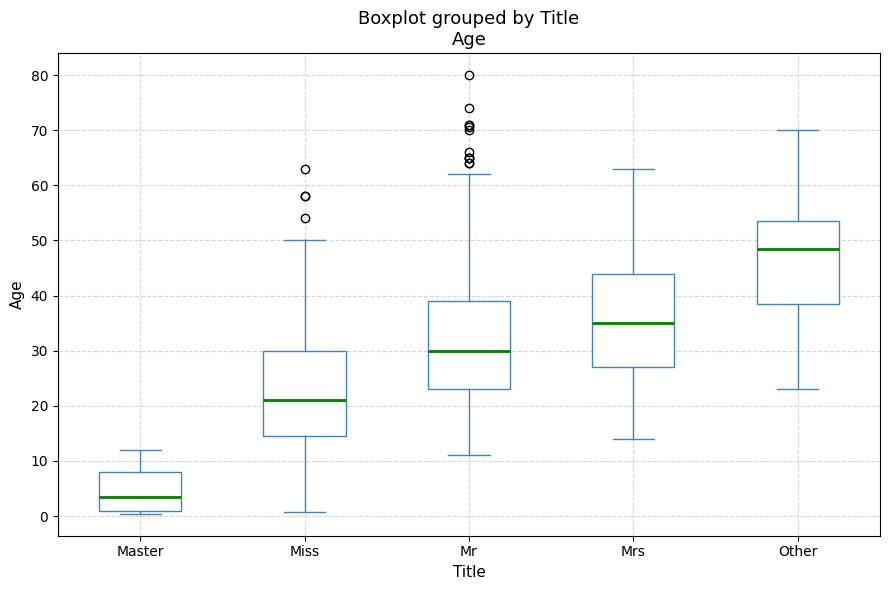

In [109]:
fig, ax = plt.subplots(figsize=(9, 6))

titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Other']
data = [df[df['Title'] == t]['Age'].dropna().values for t in titles]

bp = ax.boxplot(data, tick_labels=titles, patch_artist=True,
                medianprops=dict(color='green', linewidth=2),
                boxprops=dict(color='steelblue', facecolor='white'),
                whiskerprops=dict(color='steelblue'),
                capprops=dict(color='steelblue'),
                flierprops=dict(marker='o', color='steelblue', markerfacecolor='none', markersize=6))

ax.set_title('Boxplot grouped by Title\nAge', fontsize=13)
ax.set_xlabel('Title', fontsize=11)
ax.set_ylabel('Age', fontsize=11)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('titanic_boxplot_by_title.png', dpi=150, bbox_inches='tight')
plt.show()

In [110]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [111]:
df.drop(columns=['Cabin'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [112]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [113]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\sarth\AppData\Local\Temp\ipykernel_27456\1025092037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [114]:
df.groupby(['Title','Sex'])['Age']

In [115]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [116]:
df['Age'] = df.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [117]:
# from sklearn.ensemble import RandomForestRegressor
# import pandas as pd

# df = pd.read_csv('Cell_11.csv')

# # Encode categoricals
# df['Sex_enc'] = df['Sex'].map({'male': 0, 'female': 1})
# df['Title_enc'] = df['Title'].astype('category').cat.codes

# features = ['Pclass', 'Sex_enc', 'SibSp', 'Parch', 'Fare', 'Title_enc']

# # Split into known and unknown Age
# known = df[df['Age'].notna()]
# unknown = df[df['Age'].isna()]

# # Train on known
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(known[features], known['Age'])

# # Predict missing
# df.loc[df['Age'].isna(), 'Age'] = rf.predict(unknown[features])

In [118]:
df.drop(columns=['Name'], inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S,Other
887,888,1,1,female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,female,18.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C,Mr


In [119]:
df.drop(columns=['PassengerId', 'Ticket'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,18.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [120]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

In [121]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Other
887,1,1,0,19.0,0,0,30.0000,S,Miss
888,0,3,0,18.0,1,2,23.4500,S,Miss
889,1,1,1,26.0,0,0,30.0000,C,Mr


In [122]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['Title'], drop_first=True, dtype=int)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,1,22.0,1,0,7.2500,0,1,0,1,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,0,1,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,1,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,1,1,0,0,0
888,0,3,0,18.0,1,2,23.4500,0,1,1,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,0,1,0,0


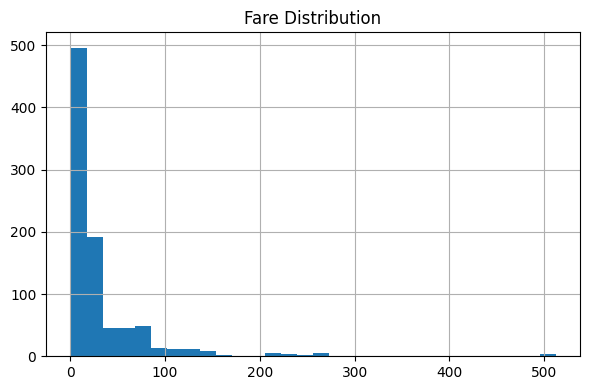

In [123]:
fig, ax = plt.subplots(figsize=(6, 4))

df['Fare'].hist(bins=30)
ax.set_title('Fare Distribution')

plt.tight_layout()
plt.show()

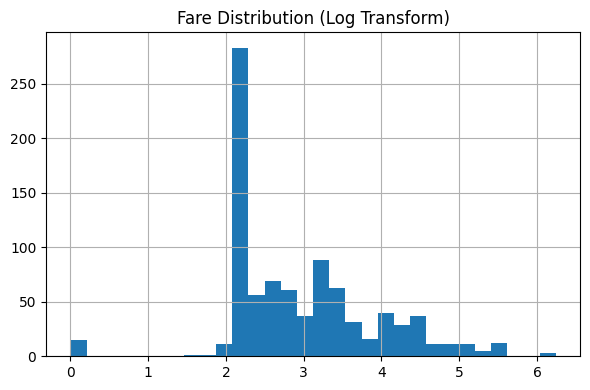

In [124]:
fig, ax = plt.subplots(figsize=(6, 4))

np.log1p(df['Fare']).hist(bins=30)
ax.set_title('Fare Distribution (Log Transform)')

plt.tight_layout()
plt.show()

In [125]:
from sklearn.preprocessing import StandardScaler
df['Fare'] = np.log1p(df['Fare'])

scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

In [159]:
# Family Size (SibSp + Parch are weak alone, combined they're strong)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is Alone?
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Age Bins (age as category is more powerful than continuous)
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                       labels=['Child', 'Teen', 'Adult', 'MidAge', 'Senior'])
df = pd.get_dummies(df, columns=['AgeBin'], drop_first=True, dtype=int)

# Fare Bins
df['FareBin'] = pd.qcut(df['Fare'], q=4, labels=[0, 1, 2, 3]).astype(int)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,IsAlone,AgeBin_Teen,AgeBin_Adult,AgeBin_MidAge,AgeBin_Senior,FareBin
0,0,3,1,22.0,1,0,-0.879741,0,1,0,1,0,0,2,0,0,1,0,0,0
1,1,1,0,38.0,1,0,1.361220,0,0,0,0,1,0,2,0,0,0,1,0,3
2,1,3,0,26.0,0,0,-0.798540,0,1,1,0,0,0,1,1,0,1,0,0,1
3,1,1,0,35.0,1,0,1.062038,0,1,0,0,1,0,2,0,0,1,0,0,3
4,0,3,1,35.0,0,0,-0.784179,0,1,0,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,-0.333698,0,1,0,0,0,1,1,1,0,1,0,0,1
887,1,1,0,19.0,0,0,0.487082,0,1,1,0,0,0,1,1,0,1,0,0,2
888,0,3,0,18.0,1,2,0.242007,0,1,1,0,0,0,4,0,1,0,0,0,2
889,1,1,1,26.0,0,0,0.487082,0,0,0,1,0,0,1,1,0,1,0,0,2


In [160]:
df.drop(columns=[
    'SibSp',    
    'Parch',    
    'Age',      
    'Fare',     
], inplace=True)

In [161]:
df

,Survived,Pclass,Sex,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,IsAlone,AgeBin_Teen,AgeBin_Adult,AgeBin_MidAge,AgeBin_Senior,FareBin
0,0,3,1,0,1,0,1,0,0,2,0,0,1,0,0,0
1,1,1,0,0,0,0,0,1,0,2,0,0,0,1,0,3
2,1,3,0,0,1,1,0,0,0,1,1,0,1,0,0,1
3,1,1,0,0,1,0,0,1,0,2,0,0,1,0,0,3
4,0,3,1,0,1,0,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,1,1,1,0,1,0,0,1
887,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,2
888,0,3,0,0,1,1,0,0,0,4,0,1,0,0,0,2
889,1,1,1,0,0,0,1,0,0,1,1,0,1,0,0,2


In [163]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X

,Pclass,Sex,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,IsAlone,AgeBin_Teen,AgeBin_Adult,AgeBin_MidAge,AgeBin_Senior,FareBin
0,3,1,0,1,0,1,0,0,2,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,2,0,0,0,1,0,3
2,3,0,0,1,1,0,0,0,1,1,0,1,0,0,1
3,1,0,0,1,0,0,1,0,2,0,0,1,0,0,3
4,3,1,0,1,0,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,1,0,0,0,1,1,1,0,1,0,0,1
887,1,0,0,1,1,0,0,0,1,1,0,1,0,0,2
888,3,0,0,1,1,0,0,0,4,0,1,0,0,0,2
889,1,1,0,0,0,1,0,0,1,1,0,1,0,0,2


In [164]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

In [167]:
from sklearn.linear_model import LogisticRegression, LinearRegression

logr = LogisticRegression()

logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8268156424581006

In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       105
           1       0.78      0.81      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [169]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.45783062695203014

In [170]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.8268156424581006

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [172]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8212290502793296

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [174]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("CV Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

CV Scores: [0.76536313 0.80898876 0.83707865 0.79775281 0.8258427 ]
Mean CV Score: 0.8070052099679869


In [175]:
from sklearn.ensemble import VotingClassifier

rf  = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)
lr  = LogisticRegression(max_iter=1000, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('Random Forest', rf),
        ('SVM',           svm),
        ('Logistic Reg',  lr)
    ],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print("Soft Voting Accuracy:  ", accuracy_score(y_test, y_pred))
print("CV Score:              ", np.mean(cross_val_score(voting_clf, X, y, cv=5)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Soft Voting Accuracy:   0.8324022346368715
CV Score:               0.8237900947837551

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [176]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
print("XGB Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))

XGB Accuracy: 0.8491620111731844


In [ ]:
xgb = XGBClassifier(n_estimators=200, max_depth=4, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('rf',  RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=5, n_estimators=500, class_weight='balanced', random_state=42)),
        ('svm', SVC(probability=True, class_weight='balanced', random_state=42)),
        ('lr',  LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
        ('xgb', xgb)
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
print("Enhanced Voting Accuracy:", accuracy_score(y_test, voting_clf.predict(X_test)))

Enhanced Voting Accuracy: 0.8268156424581006


In [180]:
from sklearn.model_selection import GridSearchCV

# Tune Random Forest
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                       rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score: ", grid_rf.best_score_)

Best RF Params: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 500}
Best RF Score:  0.8272037821333595
